In [1]:
from pprint import pprint
from Environment.model.utils import *
import pickle
import numpy as np
import matplotlib.pyplot as plt
# from Environment.model.state import State
from Environment.city import _observation

from Agent.agent import Agent

In [2]:
agent = Agent(map_sample=1, layout_sample=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty city was built.
Ground was built.
Intersections and roads were built.
Transition dictionary was built.


In [3]:
len(agent.q_table)

5456

In [5]:
cs = []
any_zeros = []
c = 0
any_zero = 0
for el in agent.q_table.values():
    if el == [0, 0, 0, 0, 0, 0]:
        c += 1        
    if 0 in el:
        any_zero += 1
cs.append(c)
any_zeros.append(any_zero)
(c, any_zero)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5456, 5456)

In [6]:
%%time

agent.learn(10000, alpha=0.5, gamma=0.9, epsilon=0.75)
c = 0
any_zero = 0
for el in agent.q_table.values():
    if el == [0, 0, 0, 0, 0, 0]:
        c += 1   
    if 0 in el:
        any_zero += 1
cs.append(c)
any_zeros.append(any_zero)
print(c, any_zero)

2571 4600
Wall time: 2min 14s


In [7]:
for state in agent.q_table.keys():
    for i in range(len(agent.q_table[state])):
        if agent.q_table[state][i] == 0:
            agent.q_table[state][i] = -1000000

In [8]:
def perform(agent: Agent, n_episodes = 100):
    c = 0
    for episode in range(n_episodes):
        agent.state = agent.env.reset()

        is_done = False

        sum_reward = 0

        while not is_done:
            # print(agent.q_table[agent.state])
            if len(set(agent.q_table[agent.state])) == 1:
                action = np.random.randint(0, 6)
            else:
                action = np.argmax(agent.q_table[agent.state])
            print('action =', action)

            next_state, reward, is_done = agent.env.step(action)
            
#             print(agent.state)
#             print(next_state)
#             print('-----------------------------------------------------------------\n')

            sum_reward += reward
            agent.state = next_state            
            agent.env.state = next_state

        if sum_reward > 0:
            c += 1
        print(f"Episode {episode}: {sum_reward = }")
    print(f"{c}/{n_episodes} is positive.")

In [10]:
perform(agent, n_episodes=10000)

action = 0
action = 0
action = 0
Episode 0: sum_reward = -10900
action = 4
Episode 1: sum_reward = -2000
action = 3
action = 0
action = 0
action = 4
Episode 2: sum_reward = -2900
action = 4
action = 3
action = 0
action = 4
Episode 3: sum_reward = -2900
action = 4
action = 0
action = 3
action = 0
action = 0
action = 4
Episode 4: sum_reward = -3500
action = 0
action = 0
Episode 5: sum_reward = -10600
action = 0
action = 0
Episode 6: sum_reward = -10600
action = 0
action = 3
Episode 7: sum_reward = -2300
action = 4
action = 0
action = 0
action = 4
action = 0
action = 0
Episode 8: sum_reward = -11800
action = 0
action = 1
action = 0
Episode 9: sum_reward = -10900
action = 3
Episode 10: sum_reward = -2000
action = 0
action = 3
Episode 11: sum_reward = -2300
action = 4
action = 0
action = 0
Episode 12: sum_reward = -10900
action = 0
action = 0
action = 0
action = 4
action = 0
action = 0
Episode 13: sum_reward = -11800
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 14: sum_rew

action = 0
action = 0
action = 4
Episode 181: sum_reward = -2600
action = 0
action = 0
action = 2
action = 4
Episode 182: sum_reward = -2900
action = 0
action = 0
Episode 183: sum_reward = -10600
action = 0
action = 4
Episode 184: sum_reward = -2300
action = 0
action = 0
action = 0
Episode 185: sum_reward = -10900
action = 4
action = 0
action = 0
action = 0
action = 2
Episode 186: sum_reward = -5500
action = 4
Episode 187: sum_reward = -10000
action = 3
action = 0
action = 0
action = 2
Episode 188: sum_reward = -5200
action = 0
action = 4
Episode 189: sum_reward = -2300
action = 4
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 190: sum_reward = -3500
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 191: sum_reward = -11800
action = 0
Episode 192: sum_reward = 5700
action = 0
action = 0
action = 0
action = 0
Episode 193: sum_reward = -11200
action = 0
action = 0
action = 0
action = 0
action = 0
action = 3
Episode 194: sum_reward = -3500
action = 

action = 0
Episode 319: sum_reward = -11200
action = 0
action = 0
action = 3
action = 0
action = 3
action = 0
action = 3
Episode 320: sum_reward = -3800
action = 0
action = 0
Episode 321: sum_reward = -10600
action = 0
action = 0
action = 0
Episode 322: sum_reward = -10900
action = 0
Episode 323: sum_reward = 5700
action = 5
action = 4
Episode 324: sum_reward = -10400
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 325: sum_reward = -11800
action = 0
action = 0
action = 5
action = 4
action = 3
action = 4
action = 0
action = 1
Episode 326: sum_reward = -9500
action = 5
action = 4
action = 0
action = 4
action = 4
action = 0
action = 0
action = 0
Episode 327: sum_reward = -20500
action = 0
action = 0
action = 0
action = 4
Episode 328: sum_reward = -2900
action = 0
action = 0
action = 0
action = 0
Episode 329: sum_reward = -11200
action = 0
action = 0
action = 0
action = 3
action = 3
Episode 330: sum_reward = 4500
action = 4
action = 3
action = 0
action = 5
action

action = 0
action = 3
action = 0
action = 3
Episode 490: sum_reward = -2900
action = 0
action = 0
Episode 491: sum_reward = -10600
action = 0
Episode 492: sum_reward = 9700
action = 0
action = 0
action = 0
Episode 493: sum_reward = -10900
action = 0
action = 4
action = 3
Episode 494: sum_reward = -2600
action = 0
action = 0
action = 0
Episode 495: sum_reward = -10900
action = 0
action = 3
Episode 496: sum_reward = -2300
action = 0
action = 4
Episode 497: sum_reward = -10300
action = 0
action = 0
Episode 498: sum_reward = 5400
action = 0
action = 0
action = 0
action = 0
action = 3
Episode 499: sum_reward = -3200
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 500: sum_reward = -11800
action = 3
Episode 501: sum_reward = -2000
action = 0
action = 4
action = 3
action = 0
action = 4
Episode 502: sum_reward = -3200
action = 0
action = 0
action = 4
Episode 503: sum_reward = -2600
action = 3
action = 4
Episode 504: sum_reward = -2300
action = 0
Episode 505: sum_rewar

action = 0
action = 4
Episode 640: sum_reward = -3200
action = 0
action = 0
action = 3
Episode 641: sum_reward = -2600
action = 3
action = 0
action = 0
action = 0
action = 0
Episode 642: sum_reward = -11500
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 643: sum_reward = -11500
action = 0
action = 3
action = 0
action = 1
action = 0
Episode 644: sum_reward = -11500
action = 0
action = 4
Episode 645: sum_reward = -10300
action = 3
action = 0
Episode 646: sum_reward = 5400
action = 3
Episode 647: sum_reward = -2000
action = 4
action = 0
action = 0
Episode 648: sum_reward = -10900
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 649: sum_reward = -12100
action = 0
action = 4
Episode 650: sum_reward = -2300
action = 0
action = 0
action = 0
action = 3
action = 0
Episode 651: sum_reward = 4500
action = 0
action = 0
action = 0
action = 0
Episode 652: sum_reward = -11200
action = 0
action = 2
Episode 653: sum_reward = -4600
action = 0
action =

action = 0
Episode 806: sum_reward = -11200
action = 0
action = 0
action = 0
action = 0
Episode 807: sum_reward = -11200
action = 0
action = 1
action = 2
action = 1
action = 1
action = 1
action = 0
Episode 808: sum_reward = -12100
action = 0
action = 0
action = 0
action = 3
Episode 809: sum_reward = -2900
action = 3
action = 0
action = 4
Episode 810: sum_reward = -2600
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
Episode 811: sum_reward = -3800
action = 3
Episode 812: sum_reward = -5000
action = 2
Episode 813: sum_reward = -4300
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 814: sum_reward = -11500
action = 0
action = 0
Episode 815: sum_reward = -10600
action = 0
action = 3
action = 0
action = 3
Episode 816: sum_reward = -2900
action = 0
action = 0
Episode 817: sum_reward = -10600
action = 0
action = 0
action = 4
action = 4
action = 4
Episode 818: sum_reward = -3200
action = 3
action = 0
action = 3
Episode 819: sum_reward = -2600
action 

action = 0
action = 0
Episode 970: sum_reward = -10600
action = 0
action = 4
action = 0
action = 0
action = 2
Episode 971: sum_reward = -5500
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 972: sum_reward = -12100
action = 0
action = 3
Episode 973: sum_reward = -2300
action = 0
action = 4
Episode 974: sum_reward = -2300
action = 3
action = 0
action = 0
action = 3
action = 4
action = 0
action = 4
Episode 975: sum_reward = -3800
action = 0
action = 0
action = 3
Episode 976: sum_reward = -2600
action = 1
Episode 977: sum_reward = -4300
action = 0
action = 3
action = 4
Episode 978: sum_reward = -10600
action = 0
action = 4
Episode 979: sum_reward = -10300
action = 0
action = 4
Episode 980: sum_reward = -2300
action = 0
action = 3
Episode 981: sum_reward = -5300
action = 3
action = 4
Episode 982: sum_reward = -2300
action = 3
action = 0
action = 3
Episode 983: sum_reward = -2600
action = 3
action = 4
action = 3
Episode 984: sum_reward = -5600
action = 0

Episode 1123: sum_reward = 5700
action = 4
action = 0
action = 0
action = 3
Episode 1124: sum_reward = -2900
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 1125: sum_reward = -11500
action = 1
Episode 1126: sum_reward = -4300
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 1127: sum_reward = -11800
action = 1
Episode 1128: sum_reward = -4300
action = 0
action = 0
action = 0
Episode 1129: sum_reward = -10900
action = 4
action = 0
action = 0
Episode 1130: sum_reward = -10900
action = 3
action = 0
action = 0
Episode 1131: sum_reward = -10900
action = 0
action = 4
action = 0
action = 3
Episode 1132: sum_reward = 4800
action = 0
action = 3
Episode 1133: sum_reward = -2300
action = 0
action = 0
Episode 1134: sum_reward = 9400
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 1135: sum_reward = -11800
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 1136: sum_reward = -11500
action = 3
action = 0
action = 3
Episod

action = 2
Episode 1279: sum_reward = -4600
action = 4
action = 0
action = 0
action = 0
action = 4
action = 4
Episode 1280: sum_reward = -3500
action = 0
action = 0
action = 3
action = 0
action = 4
Episode 1281: sum_reward = -3200
action = 0
action = 4
action = 0
action = 0
action = 0
action = 2
Episode 1282: sum_reward = -5800
action = 0
action = 3
Episode 1283: sum_reward = -2300
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 1284: sum_reward = -3800
action = 0
action = 4
action = 3
action = 0
action = 0
action = 0
Episode 1285: sum_reward = -11800
action = 3
action = 3
Episode 1286: sum_reward = -5300
action = 3
action = 0
action = 0
action = 0
Episode 1287: sum_reward = -11200
action = 0
action = 3
Episode 1288: sum_reward = -2300
action = 4
action = 0
action = 0
Episode 1289: sum_reward = -10900
action = 0
action = 0
action = 4
action = 4
Episode 1290: sum_reward = -2900
action = 3
action = 4
action = 0
action = 0
action = 0
action = 3
Episode

action = 0
action = 1
action = 4
Episode 1448: sum_reward = -2600
action = 2
Episode 1449: sum_reward = -4300
action = 0
action = 0
action = 0
action = 3
action = 0
action = 3
Episode 1450: sum_reward = -3500
action = 3
action = 0
action = 0
action = 0
Episode 1451: sum_reward = -11200
action = 3
Episode 1452: sum_reward = 5700
action = 3
action = 0
action = 3
Episode 1453: sum_reward = -2600
action = 0
action = 3
Episode 1454: sum_reward = -2300
action = 3
Episode 1455: sum_reward = -5000
action = 0
action = 0
Episode 1456: sum_reward = -10600
action = 4
action = 1
Episode 1457: sum_reward = -4600
action = 4
action = 0
action = 0
Episode 1458: sum_reward = 9100
action = 4
Episode 1459: sum_reward = -2000
action = 0
Episode 1460: sum_reward = 5700
action = 0
Episode 1461: sum_reward = 5700
action = 0
action = 3
Episode 1462: sum_reward = -2300
action = 3
Episode 1463: sum_reward = -2000
action = 4
action = 0
action = 2
action = 3
Episode 1464: sum_reward = -2900
action = 0
action = 0
a

action = 0
action = 0
action = 1
action = 5
action = 0
Episode 1601: sum_reward = -14600
action = 4
Episode 1602: sum_reward = 5700
action = 0
action = 0
action = 0
action = 0
action = 0
action = 5
action = 2
action = 4
Episode 1603: sum_reward = -15200
action = 4
Episode 1604: sum_reward = 5700
action = 3
action = 3
Episode 1605: sum_reward = -2300
action = 0
action = 4
action = 0
action = 1
Episode 1606: sum_reward = -5200
action = 0
action = 0
action = 0
action = 0
Episode 1607: sum_reward = -11200
action = 3
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 1608: sum_reward = -12100
action = 0
action = 4
Episode 1609: sum_reward = -2300
action = 3
action = 0
action = 0
action = 0
Episode 1610: sum_reward = -11200
action = 4
action = 0
action = 4
Episode 1611: sum_reward = -2600
action = 4
action = 0
action = 0
action = 3
Episode 1612: sum_reward = -2900
action = 0
action = 0
action = 0
action = 1
Episode 1613: sum_reward = -5200
action = 0
action = 0
action 

action = 0
action = 0
action = 3
Episode 1769: sum_reward = -2600
action = 0
action = 0
action = 0
action = 0
action = 1
action = 2
action = 1
action = 3
Episode 1770: sum_reward = -7100
action = 3
Episode 1771: sum_reward = -2000
action = 0
action = 0
action = 0
action = 3
Episode 1772: sum_reward = -2900
action = 0
action = 1
action = 4
action = 0
action = 0
action = 3
action = 0
Episode 1773: sum_reward = 3900
action = 0
action = 3
Episode 1774: sum_reward = -2300
action = 3
action = 0
action = 0
action = 3
action = 4
action = 0
action = 4
Episode 1775: sum_reward = -3800
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 1776: sum_reward = -11500
action = 0
action = 0
action = 3
Episode 1777: sum_reward = -2600
action = 0
action = 0
action = 4
action = 4
Episode 1778: sum_reward = -2900
action = 4
action = 0
action = 0
action = 0
action = 0
action = 1
action = 1
action = 5
action = 1
action = 4
action = 3
action = 0
action = 4
action = 0
action = 0
action = 0
Episode 17

Episode 1921: sum_reward = 9700
action = 0
action = 4
action = 0
action = 0
Episode 1922: sum_reward = -11200
action = 0
action = 0
Episode 1923: sum_reward = -10600
action = 0
action = 0
action = 4
action = 0
action = 1
action = 4
Episode 1924: sum_reward = -3500
action = 3
action = 0
action = 0
Episode 1925: sum_reward = -10900
action = 3
Episode 1926: sum_reward = -2000
action = 0
action = 3
action = 0
action = 3
Episode 1927: sum_reward = -2900
action = 0
action = 0
Episode 1928: sum_reward = 5400
action = 0
action = 4
Episode 1929: sum_reward = -2300
action = 0
action = 0
Episode 1930: sum_reward = -10600
action = 3
action = 0
action = 3
Episode 1931: sum_reward = -2600
action = 0
action = 0
Episode 1932: sum_reward = -10600
action = 5
action = 0
action = 0
Episode 1933: sum_reward = -19000
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 1934: sum_reward = -11500
action = 4
action = 0
action = 0
action = 2
Episode 1935: sum_reward = -5200
action = 3
Episode 1936: su

action = 0
action = 3
action = 0
action = 0
action = 5
action = 5
action = 5
action = 4
action = 5
action = 0
action = 5
action = 4
action = 4
action = 2
Episode 2083: sum_reward = -29300
action = 3
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 2084: sum_reward = -11800
action = 4
action = 0
action = 3
Episode 2085: sum_reward = -2600
action = 0
action = 3
Episode 2086: sum_reward = -2300
action = 0
action = 4
Episode 2087: sum_reward = -2300
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 2088: sum_reward = -11800
action = 3
Episode 2089: sum_reward = -5000
action = 0
action = 0
action = 3
action = 0
Episode 2090: sum_reward = 4800
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 2091: sum_reward = -11500
action = 0
action = 0
Episode 2092: sum_reward = -10600
action = 0
action = 3
Episode 2093: sum_reward = -5300
action = 0
action = 0
action = 3
action = 0
action = 1
action = 0
Episode 2094: sum_reward = -11800
action = 4
actio

action = 4
action = 3
Episode 2241: sum_reward = -2300
action = 0
action = 1
action = 1
action = 0
action = 0
action = 0
action = 2
Episode 2242: sum_reward = -6100
action = 0
action = 0
Episode 2243: sum_reward = -10600
action = 0
action = 3
action = 3
Episode 2244: sum_reward = -5600
action = 3
action = 0
Episode 2245: sum_reward = 5400
action = 4
action = 0
action = 0
action = 0
Episode 2246: sum_reward = -11200
action = 4
action = 0
action = 0
Episode 2247: sum_reward = 5100
action = 0
action = 0
Episode 2248: sum_reward = -10600
action = 0
action = 0
action = 3
action = 0
action = 0
action = 4
Episode 2249: sum_reward = -3500
action = 0
action = 0
Episode 2250: sum_reward = -10600
action = 3
action = 2
Episode 2251: sum_reward = -4600
action = 0
action = 4
action = 0
action = 0
action = 0
action = 3
Episode 2252: sum_reward = -3500
action = 0
action = 0
Episode 2253: sum_reward = -10600
action = 0
action = 0
Episode 2254: sum_reward = -10600
action = 3
Episode 2255: sum_reward = -

action = 0
action = 0
action = 0
action = 0
Episode 2403: sum_reward = -11200
action = 0
action = 0
action = 4
action = 0
action = 1
action = 4
Episode 2404: sum_reward = -3500
action = 0
Episode 2405: sum_reward = 9700
action = 3
action = 0
action = 4
action = 3
Episode 2406: sum_reward = -2900
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 2407: sum_reward = -11500
action = 0
action = 3
Episode 2408: sum_reward = -5300
action = 0
action = 0
action = 0
action = 0
Episode 2409: sum_reward = -11200
action = 0
action = 4
Episode 2410: sum_reward = -2300
action = 0
action = 3
Episode 2411: sum_reward = -2300
action = 3
action = 0
Episode 2412: sum_reward = 5400
action = 0
Episode 2413: sum_reward = 9700
action = 4
action = 0
action = 4
action = 4
action = 0
action = 0
action = 0
Episode 2414: sum_reward = -12100
action = 0
action = 0
action = 2
action = 4
Episode 2415: sum_reward = -2900
action = 0
action = 3
Episode 2416: sum_reward = -2300
action = 4
action = 3
Episode 2

action = 0
action = 4
action = 0
action = 1
action = 5
action = 0
Episode 2561: sum_reward = -14900
action = 0
action = 3
action = 0
action = 0
action = 4
Episode 2562: sum_reward = -3200
action = 0
action = 0
Episode 2563: sum_reward = -10600
action = 0
action = 0
Episode 2564: sum_reward = -10600
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 2565: sum_reward = -14200
action = 4
action = 0
action = 3
action = 4
action = 0
action = 4
Episode 2566: sum_reward = -3500
action = 0
action = 0
Episode 2567: sum_reward = -10600
action = 0
Episode 2568: sum_reward = 5700
action = 4
action = 0
action = 0
action = 0
action = 3
Episode 2569: sum_reward = -3200
action = 3
action = 0
action = 0
action = 3
Episode 2570: sum_reward = -2900
action = 4
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 2571: sum_reward = -11800
action = 0
action = 0
action = 4
Episode 2572: su

action = 0
action = 0
action = 0
action = 0
action = 0
Episode 2705: sum_reward = -11500
action = 0
action = 0
action = 0
Episode 2706: sum_reward = 5100
action = 0
action = 0
Episode 2707: sum_reward = -10600
action = 0
action = 3
action = 0
action = 3
action = 0
action = 0
Episode 2708: sum_reward = -11800
action = 3
action = 0
action = 5
action = 4
action = 3
action = 0
action = 0
action = 1
Episode 2709: sum_reward = -9500
action = 0
action = 0
action = 3
Episode 2710: sum_reward = 5100
action = 0
action = 0
action = 0
action = 0
Episode 2711: sum_reward = -11200
action = 0
action = 3
Episode 2712: sum_reward = -2300
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 2713: sum_reward = -11500
action = 0
action = 0
action = 4
Episode 2714: sum_reward = -10600
action = 0
action = 4
Episode 2715: sum_reward = -2300
action = 3
action = 0
action = 4
Episode 2716: sum_reward = -2600
action = 0
Episode 2717: sum_reward = 5700
action = 0
action = 3
action = 0
Episode 2718: sum_

action = 0
action = 3
action = 4
action = 0
action = 0
Episode 2843: sum_reward = -11500
action = 1
Episode 2844: sum_reward = -4300
action = 0
action = 0
action = 0
Episode 2845: sum_reward = -10900
action = 3
Episode 2846: sum_reward = -2000
action = 4
action = 3
Episode 2847: sum_reward = -2300
action = 4
action = 3
Episode 2848: sum_reward = -2300
action = 3
action = 4
action = 0
action = 3
Episode 2849: sum_reward = -2900
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 2850: sum_reward = -3200
action = 0
action = 0
action = 0
action = 2
action = 4
Episode 2851: sum_reward = -3200
action = 0
action = 3
action = 0
action = 0
action = 3
Episode 2852: sum_reward = -3200
action = 5
action = 0
action = 4
Episode 2853: sum_reward = -10700
action = 0
action = 0
Episode 2854: sum_reward = -10600
action = 3
action = 0
action = 3
Episode 2855: sum_reward = -2600
action = 0
action = 0
action = 4
action = 3
action = 0
action = 4
Episode 2856: sum_reward = -3500
action = 3
Episod

action = 3
action = 3
action = 0
action = 0
Episode 2992: sum_reward = -11200
action = 0
action = 0
action = 0
action = 3
action = 4
action = 0
action = 4
Episode 2993: sum_reward = -3800
action = 0
action = 0
action = 1
Episode 2994: sum_reward = -4900
action = 3
action = 4
action = 0
action = 0
action = 0
Episode 2995: sum_reward = -11500
action = 0
action = 0
action = 3
Episode 2996: sum_reward = -2600
action = 4
action = 0
action = 0
Episode 2997: sum_reward = -10900
action = 0
action = 0
action = 3
action = 0
Episode 2998: sum_reward = 4800
action = 4
action = 0
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 2999: sum_reward = -3800
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 3000: sum_reward = -11500
action = 0
action = 5
action = 3
action = 5
action = 2
Episode 3001: sum_reward = -16700
action = 3
action = 4
Episode 3002: sum_reward = -2300
action = 0
action = 3
action = 3
action = 3
Episode 3003: sum_reward = -5900
action = 3
action = 0
action

action = 0
action = 3
Episode 3147: sum_reward = -2300
action = 3
action = 0
action = 4
Episode 3148: sum_reward = -2600
action = 0
action = 0
action = 0
Episode 3149: sum_reward = 9100
action = 0
action = 3
action = 0
action = 0
action = 0
action = 0
Episode 3150: sum_reward = -11800
action = 3
action = 0
action = 3
action = 0
action = 0
Episode 3151: sum_reward = -11500
action = 0
action = 4
Episode 3152: sum_reward = -2300
action = 0
action = 0
action = 0
action = 0
Episode 3153: sum_reward = 4800
action = 4
action = 0
action = 3
action = 4
action = 0
action = 0
Episode 3154: sum_reward = -11800
action = 3
action = 0
action = 0
action = 0
action = 1
action = 0
action = 0
action = 0
action = 0
action = 3
action = 4
action = 0
action = 4
Episode 3155: sum_reward = -5600
action = 0
action = 0
action = 0
action = 0
Episode 3156: sum_reward = -11200
action = 0
action = 0
Episode 3157: sum_reward = -10600
action = 0
action = 4
action = 3
action = 0
action = 0
Episode 3158: sum_reward = -1

action = 4
action = 0
Episode 3335: sum_reward = 5400
action = 0
action = 4
action = 0
action = 0
Episode 3336: sum_reward = -11200
action = 0
action = 0
action = 0
Episode 3337: sum_reward = -10900
action = 0
action = 0
action = 0
action = 4
action = 3
Episode 3338: sum_reward = -3200
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 3339: sum_reward = -11500
action = 0
action = 3
Episode 3340: sum_reward = -2300
action = 0
action = 0
action = 0
Episode 3341: sum_reward = -10900
action = 3
action = 0
action = 4
Episode 3342: sum_reward = -2600
action = 0
action = 0
Episode 3343: sum_reward = -10600
action = 4
action = 0
action = 0
action = 0
Episode 3344: sum_reward = -11200
action = 0
action = 0
action = 4
Episode 3345: sum_reward = -10600
action = 4
Episode 3346: sum_reward = -2000
action = 0
action = 4
action = 0
action = 3
action = 3
action = 0
action = 1
action = 4
Episode 3347: sum_reward = -4100
action = 0
action = 2
action = 5
action = 0
Episode 3348: sum_reward =

action = 0
action = 1
action = 4
action = 0
action = 0
action = 3
action = 0
Episode 3478: sum_reward = 3900
action = 3
Episode 3479: sum_reward = -5000
action = 0
action = 3
Episode 3480: sum_reward = -2300
action = 0
action = 3
Episode 3481: sum_reward = -2300
action = 0
action = 0
action = 0
Episode 3482: sum_reward = 5100
action = 0
action = 4
action = 2
Episode 3483: sum_reward = -4900
action = 4
Episode 3484: sum_reward = -2000
action = 0
action = 2
action = 4
Episode 3485: sum_reward = -10600
action = 0
action = 3
Episode 3486: sum_reward = -5300
action = 4
action = 0
action = 0
Episode 3487: sum_reward = -10900
action = 0
action = 1
action = 0
Episode 3488: sum_reward = -10900
action = 0
action = 0
action = 0
Episode 3489: sum_reward = -10900
action = 0
action = 4
Episode 3490: sum_reward = -2300
action = 0
action = 0
action = 0
Episode 3491: sum_reward = -10900
action = 4
Episode 3492: sum_reward = -2000
action = 0
action = 0
action = 3
action = 0
action = 3
Episode 3493: sum_

action = 0
action = 0
action = 5
action = 1
action = 4
Episode 3645: sum_reward = -6300
action = 0
action = 0
Episode 3646: sum_reward = -10600
action = 0
action = 0
action = 0
action = 0
Episode 3647: sum_reward = -11200
action = 4
action = 3
action = 0
action = 0
Episode 3648: sum_reward = -11200
action = 4
action = 0
action = 3
action = 0
action = 3
action = 0
action = 3
Episode 3649: sum_reward = -3800
action = 0
action = 0
Episode 3650: sum_reward = 5400
action = 3
action = 3
action = 0
action = 3
Episode 3651: sum_reward = -2900
action = 0
action = 4
action = 0
action = 3
action = 0
action = 3
Episode 3652: sum_reward = -3500
action = 0
action = 3
Episode 3653: sum_reward = -2300
action = 4
action = 1
Episode 3654: sum_reward = -4600
action = 0
Episode 3655: sum_reward = 5700
action = 0
action = 0
action = 2
Episode 3656: sum_reward = -4900
action = 0
action = 0
action = 0
Episode 3657: sum_reward = -10900
action = 0
action = 0
action = 0
Episode 3658: sum_reward = -10900
action 

action = 0
action = 0
action = 5
action = 5
action = 5
action = 5
action = 5
action = 5
action = 5
action = 0
action = 3
action = 0
action = 4
action = 0
action = 3
Episode 3794: sum_reward = -20500
action = 4
action = 3
action = 3
action = 0
action = 3
action = 3
Episode 3795: sum_reward = -3500
action = 3
action = 0
action = 4
Episode 3796: sum_reward = 5100
action = 0
action = 0
action = 0
action = 2
Episode 3797: sum_reward = -5200
action = 4
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 3798: sum_reward = -11800
action = 0
action = 0
action = 0
Episode 3799: sum_reward = -10900
action = 0
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 3800: sum_reward = -3500
action = 0
action = 0
Episode 3801: sum_reward = -10600
action = 3
action = 0
action = 4
action = 0
action = 4
Episode 3802: sum_reward = -3200
action = 0
action = 0
action = 0
action = 1
Episode 3803: sum_reward = -5200
action = 0
action = 0
action = 0
Episode 3804: sum_reward = -10900
action

action = 0
action = 3
action = 0
action = 0
action = 0
Episode 3949: sum_reward = -11800
action = 0
action = 0
Episode 3950: sum_reward = -10600
action = 1
Episode 3951: sum_reward = -4300
action = 0
action = 4
action = 0
action = 0
action = 0
action = 2
Episode 3952: sum_reward = -5800
action = 0
action = 0
Episode 3953: sum_reward = -10600
action = 0
action = 4
Episode 3954: sum_reward = -10300
action = 1
Episode 3955: sum_reward = -4300
action = 0
Episode 3956: sum_reward = 5700
action = 5
action = 4
Episode 3957: sum_reward = -10400
action = 3
action = 0
action = 3
action = 0
action = 0
Episode 3958: sum_reward = -11500
action = 4
action = 0
action = 0
Episode 3959: sum_reward = -10900
action = 0
action = 0
Episode 3960: sum_reward = -10600
action = 4
Episode 3961: sum_reward = -2000
action = 0
action = 0
Episode 3962: sum_reward = -10600
action = 5
action = 0
action = 4
action = 0
action = 0
action = 0
action = 5
action = 0
action = 0
action = 0
action = 3
Episode 3963: sum_reward

action = 0
action = 3
action = 0
action = 0
action = 0
action = 0
Episode 4103: sum_reward = -11800
action = 0
action = 5
action = 3
action = 3
action = 5
action = 2
Episode 4104: sum_reward = -17000
action = 3
action = 0
action = 0
action = 0
Episode 4105: sum_reward = -11200
action = 0
action = 5
action = 1
action = 0
Episode 4106: sum_reward = -14300
action = 4
action = 2
Episode 4107: sum_reward = -4600
action = 0
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 4108: sum_reward = -11800
action = 4
action = 0
action = 0
Episode 4109: sum_reward = -10900
action = 0
action = 0
Episode 4110: sum_reward = 5400
action = 0
action = 4
action = 3
action = 3
action = 0
action = 2
action = 3
Episode 4111: sum_reward = -3800
action = 0
action = 3
Episode 4112: sum_reward = -2300
action = 0
action = 0
Episode 4113: sum_reward = -10600
action = 0
action = 1
action = 0
Episode 4114: sum_reward = -10900
action = 4
action = 3
action = 0
action = 0
action = 0
Episode 4115: sum_reward 

action = 4
action = 0
action = 3
action = 0
action = 3
Episode 4264: sum_reward = -3200
action = 0
action = 4
Episode 4265: sum_reward = -2300
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 4266: sum_reward = -3200
action = 0
action = 4
action = 0
action = 0
action = 0
action = 3
Episode 4267: sum_reward = -3500
action = 3
Episode 4268: sum_reward = -5000
action = 0
action = 0
action = 3
Episode 4269: sum_reward = -2600
action = 0
action = 0
action = 4
Episode 4270: sum_reward = -10600
action = 0
action = 4
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 4271: sum_reward = -12100
action = 5
action = 0
Episode 4272: sum_reward = -2700
action = 0
action = 0
Episode 4273: sum_reward = -10600
action = 0
action = 4
Episode 4274: sum_reward = -2300
action = 3
action = 3
action = 3
Episode 4275: sum_reward = -10600
action = 0
action = 4
action = 3
Episode 4276: sum_reward = -2600
action = 0
action = 4
Episode 4277: sum_reward = -2300
action = 4
action = 0
action

action = 0
action = 3
action = 0
action = 0
Episode 4415: sum_reward = -11200
action = 3
action = 3
Episode 4416: sum_reward = -5300
action = 0
action = 0
action = 0
action = 3
Episode 4417: sum_reward = -2900
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 4418: sum_reward = -11500
action = 0
action = 0
action = 4
Episode 4419: sum_reward = -2600
action = 0
action = 0
action = 0
Episode 4420: sum_reward = -10900
action = 0
action = 0
action = 3
action = 4
action = 0
action = 0
Episode 4421: sum_reward = -11800
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 4422: sum_reward = -11900
action = 3
action = 4
action = 4
Episode 4423: sum_reward = -10600
action = 0
action = 0
action = 4
action = 0
action = 0
Episode 4424: sum_reward = -11500
action = 0
action = 4
action = 0
action = 1
action = 4
Episode 4425: sum_reward = -3200
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 0
Episode 4426: sum_reward = -12100
ac

action = 0
action = 0
action = 3
action = 0
action = 3
action = 0
action = 0
Episode 4567: sum_reward = -12100
action = 4
action = 1
Episode 4568: sum_reward = -4600
action = 0
action = 1
Episode 4569: sum_reward = -4600
action = 0
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 4570: sum_reward = -3500
action = 0
action = 3
action = 0
Episode 4571: sum_reward = 5100
action = 0
action = 4
action = 0
action = 0
action = 0
action = 3
Episode 4572: sum_reward = -3500
action = 4
action = 0
action = 0
action = 0
Episode 4573: sum_reward = -11200
action = 3
action = 4
action = 4
Episode 4574: sum_reward = -10600
action = 0
action = 4
action = 3
action = 0
action = 0
action = 0
Episode 4575: sum_reward = -11800
action = 0
action = 0
Episode 4576: sum_reward = -10600
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 4577: sum_reward = -11500
action = 0
action = 0
action = 4
action = 0
action = 1
action = 4
Episode 4578: sum_reward = -3500
action = 3
Episode 4579: su

action = 4
Episode 4726: sum_reward = -2000
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 4727: sum_reward = -11500
action = 0
action = 0
action = 3
Episode 4728: sum_reward = -2600
action = 3
action = 0
action = 3
Episode 4729: sum_reward = -2600
action = 0
action = 0
action = 3
Episode 4730: sum_reward = -2600
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 4731: sum_reward = -11500
action = 0
action = 0
Episode 4732: sum_reward = 9400
action = 3
Episode 4733: sum_reward = -2000
action = 0
action = 0
action = 0
action = 4
Episode 4734: sum_reward = -2900
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 4735: sum_reward = -12100
action = 0
action = 3
Episode 4736: sum_reward = -2300
action = 3
action = 0
action = 0
Episode 4737: sum_reward = -10900
action = 1
Episode 4738: sum_reward = -4300
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 4739: sum_reward = -11500
action = 0
action = 0
action = 0
Episod

action = 3
action = 0
action = 0
action = 0
Episode 4879: sum_reward = -11200
action = 1
Episode 4880: sum_reward = -4300
action = 4
Episode 4881: sum_reward = 9700
action = 0
action = 0
Episode 4882: sum_reward = -10600
action = 3
action = 0
action = 3
Episode 4883: sum_reward = -5600
action = 0
action = 0
Episode 4884: sum_reward = -10600
action = 0
action = 3
action = 0
action = 3
Episode 4885: sum_reward = -2900
action = 0
action = 0
Episode 4886: sum_reward = -10600
action = 0
action = 0
action = 0
action = 1
action = 1
action = 0
action = 0
action = 0
Episode 4887: sum_reward = 3600
action = 2
Episode 4888: sum_reward = -4300
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
Episode 4889: sum_reward = -11800
action = 0
action = 0
action = 0
Episode 4890: sum_reward = -10900
action = 4
action = 3
Episode 4891: sum_reward = -2300
action = 0
action = 4
action = 0
action = 1
action = 4
Episode 4892: sum_reward = -3200
action = 0
action = 0
Episode 4893: sum_reward = -

action = 3
action = 0
action = 3
action = 0
action = 3
Episode 5038: sum_reward = -3200
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 5039: sum_reward = -11500
action = 4
action = 2
Episode 5040: sum_reward = -4600
action = 3
action = 4
action = 0
action = 0
Episode 5041: sum_reward = -11200
action = 0
action = 0
action = 0
Episode 5042: sum_reward = -10900
action = 0
action = 0
action = 0
action = 1
Episode 5043: sum_reward = -5200
action = 0
action = 0
action = 0
Episode 5044: sum_reward = -10900
action = 4
action = 0
action = 3
Episode 5045: sum_reward = -2600
action = 0
action = 0
action = 4
action = 0
action = 3
Episode 5046: sum_reward = 4500
action = 4
action = 3
action = 0
action = 0
action = 0
Episode 5047: sum_reward = -11500
action = 0
action = 0
action = 4
action = 0
action = 3
action = 0
action = 0
Episode 5048: sum_reward = -12100
action = 5
action = 4
Episode 5049: sum_reward = -10400
action = 0
action = 0
action = 0
Episode 5050: sum_reward = -10900
act

action = 0
action = 0
action = 4
action = 0
action = 0
action = 3
Episode 5190: sum_reward = -3500
action = 0
Episode 5191: sum_reward = -10300
action = 3
action = 4
action = 0
action = 0
action = 5
action = 4
action = 3
action = 5
action = 2
Episode 5192: sum_reward = -17900
action = 0
action = 0
action = 0
action = 4
Episode 5193: sum_reward = -2900
action = 0
action = 0
Episode 5194: sum_reward = -10600
action = 0
action = 3
Episode 5195: sum_reward = -2300
action = 0
action = 4
Episode 5196: sum_reward = -2300
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 5197: sum_reward = -11500
action = 3
action = 0
action = 0
action = 4
action = 0
action = 4
Episode 5198: sum_reward = -3500
action = 0
action = 4
Episode 5199: sum_reward = -2300
action = 3
action = 0
action = 0
Episode 5200: sum_reward = -10900
action = 0
action = 0
action = 1
Episode 5201: sum_reward = -4900
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 5202: sum_reward = -11500
action = 0
acti

action = 0
action = 0
action = 4
action = 0
action = 4
Episode 5351: sum_reward = -3500
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 5352: sum_reward = -11800
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 5353: sum_reward = -11500
action = 3
action = 4
action = 0
action = 0
action = 0
Episode 5354: sum_reward = -11500
action = 0
action = 3
action = 0
action = 3
Episode 5355: sum_reward = -2900
action = 0
action = 0
action = 3
Episode 5356: sum_reward = -2600
action = 3
Episode 5357: sum_reward = -2000
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 5358: sum_reward = -12100
action = 3
action = 0
action = 3
Episode 5359: sum_reward = -2600
action = 4
action = 0
action = 4
action = 2
Episode 5360: sum_reward = -5200
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 5361: sum_reward = -12100
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 5362: sum_reward = 

action = 0
Episode 5496: sum_reward = -10300
action = 0
action = 0
action = 3
Episode 5497: sum_reward = -2600
action = 0
action = 4
action = 3
Episode 5498: sum_reward = -2600
action = 3
action = 0
action = 0
action = 0
Episode 5499: sum_reward = -11200
action = 0
action = 0
action = 4
Episode 5500: sum_reward = -2600
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 5501: sum_reward = -11500
action = 3
Episode 5502: sum_reward = -2000
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 5503: sum_reward = -11800
action = 0
action = 4
action = 3
action = 0
action = 0
action = 0
Episode 5504: sum_reward = -11800
action = 0
action = 4
action = 4
Episode 5505: sum_reward = -2600
action = 4
action = 0
action = 0
action = 4
Episode 5506: sum_reward = -2900
action = 0
action = 1
Episode 5507: sum_reward = -4600
action = 0
action = 0
action = 0
Episode 5508: sum_reward = 5100
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 5509: sum

action = 0
action = 0
action = 0
action = 3
Episode 5641: sum_reward = -2900
action = 1
Episode 5642: sum_reward = -4300
action = 0
Episode 5643: sum_reward = 9700
action = 3
Episode 5644: sum_reward = -2000
action = 0
action = 3
action = 0
Episode 5645: sum_reward = 5100
action = 4
action = 0
action = 3
action = 0
action = 3
action = 0
action = 3
Episode 5646: sum_reward = -3800
action = 0
action = 4
action = 1
Episode 5647: sum_reward = -4900
action = 3
action = 0
action = 0
Episode 5648: sum_reward = -10900
action = 0
action = 3
Episode 5649: sum_reward = -2300
action = 0
action = 0
action = 4
action = 0
action = 4
Episode 5650: sum_reward = -3200
action = 0
action = 0
Episode 5651: sum_reward = -10600
action = 3
action = 4
action = 1
Episode 5652: sum_reward = -4900
action = 4
action = 0
action = 0
action = 1
action = 1
action = 5
action = 0
Episode 5653: sum_reward = -15200
action = 4
action = 0
action = 0
action = 5
action = 1
Episode 5654: sum_reward = -13600
action = 0
action =

action = 0
action = 0
action = 0
Episode 5801: sum_reward = -10900
action = 4
action = 4
Episode 5802: sum_reward = -2300
action = 3
Episode 5803: sum_reward = -2000
action = 0
action = 0
action = 3
Episode 5804: sum_reward = -5600
action = 0
action = 0
Episode 5805: sum_reward = 9400
action = 0
Episode 5806: sum_reward = 9700
action = 3
action = 4
action = 0
action = 4
Episode 5807: sum_reward = -2900
action = 3
action = 3
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 5808: sum_reward = -12100
action = 0
action = 1
Episode 5809: sum_reward = -4600
action = 0
action = 0
Episode 5810: sum_reward = 5400
action = 0
action = 0
Episode 5811: sum_reward = -10600
action = 4
Episode 5812: sum_reward = -2000
action = 1
Episode 5813: sum_reward = -4300
action = 3
action = 0
action = 4
action = 0
action = 3
action = 0
action = 0
Episode 5814: sum_reward = -12100
action = 0
action = 0
action = 0
action = 0
action = 5
action = 2
action = 2
action = 5
action = 0
action = 0
action = 

action = 3
action = 0
action = 0
action = 0
action = 0
Episode 5953: sum_reward = -11500
action = 0
action = 4
Episode 5954: sum_reward = -2300
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 5955: sum_reward = -11800
action = 0
action = 3
action = 0
action = 0
action = 4
Episode 5956: sum_reward = -3200
action = 3
action = 0
action = 4
action = 0
action = 0
action = 0
Episode 5957: sum_reward = -11800
action = 0
action = 0
action = 4
Episode 5958: sum_reward = -2600
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 5959: sum_reward = -11800
action = 0
action = 0
action = 3
action = 3
action = 0
action = 0
action = 0
Episode 5960: sum_reward = -12100
action = 4
Episode 5961: sum_reward = -10000
action = 4
action = 0
action = 4
Episode 5962: sum_reward = -2600
action = 0
action = 3
Episode 5963: sum_reward = -2300
action = 0
action = 1
Episode 5964: sum_reward = -4600
action = 0
action = 3
Episode 5965: sum_reward = -2300
action = 0
acti

action = 4
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 6097: sum_reward = -12200
action = 0
action = 3
Episode 6098: sum_reward = -2300
action = 0
action = 3
Episode 6099: sum_reward = -2300
action = 3
action = 0
action = 0
action = 4
Episode 6100: sum_reward = -2900
action = 0
Episode 6101: sum_reward = 9700
action = 2
Episode 6102: sum_reward = -4300
action = 0
action = 0
action = 0
Episode 6103: sum_reward = -10900
action = 0
action = 3
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 6104: sum_reward = -12100
action = 0
action = 0
action = 0
Episode 6105: sum_reward = -10900
action = 0
action = 0
action = 0
action = 2
Episode 6106: sum_reward = -5200
action = 0
action = 0
Episode 6107: sum_reward = -10600
action = 0
action = 3
action = 0
action = 0
action = 5
action = 2
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 3
Episode 6108: sum_reward = -8700
action = 4
Episode 6109: sum_reward = -4000
action

action = 0
action = 0
Episode 6236: sum_reward = -10600
action = 0
action = 4
action = 0
action = 0
action = 0
Episode 6237: sum_reward = -11500
action = 3
action = 0
action = 0
action = 2
Episode 6238: sum_reward = -5200
action = 3
Episode 6239: sum_reward = -2000
action = 3
action = 0
action = 0
Episode 6240: sum_reward = -10900
action = 0
action = 2
Episode 6241: sum_reward = -4600
action = 3
action = 0
action = 0
action = 4
Episode 6242: sum_reward = -2900
action = 1
Episode 6243: sum_reward = -4300
action = 4
action = 0
action = 2
action = 5
action = 4
Episode 6244: sum_reward = -6300
action = 0
action = 0
action = 0
action = 0
Episode 6245: sum_reward = -11200
action = 0
action = 0
action = 0
action = 0
Episode 6246: sum_reward = -11200
action = 0
action = 3
action = 3
Episode 6247: sum_reward = -5600
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 6248: sum_reward = -11500
action = 0
action = 3
Episode 6249: sum_reward = -2300
action = 3
action = 2
Episode 6250: s

action = 0
action = 0
action = 0
Episode 6381: sum_reward = -10900
action = 3
action = 0
action = 4
Episode 6382: sum_reward = -2600
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 6383: sum_reward = -11800
action = 1
Episode 6384: sum_reward = -4300
action = 0
action = 1
Episode 6385: sum_reward = -4600
action = 0
action = 4
Episode 6386: sum_reward = -2300
action = 3
Episode 6387: sum_reward = -5000
action = 3
action = 0
action = 0
Episode 6388: sum_reward = -10900
action = 0
action = 4
Episode 6389: sum_reward = -2300
action = 0
action = 4
action = 0
action = 0
action = 2
Episode 6390: sum_reward = -5500
action = 3
action = 0
action = 0
action = 4
action = 0
action = 0
Episode 6391: sum_reward = -11800
action = 0
action = 0
action = 0
Episode 6392: sum_reward = -10900
action = 0
action = 0
action = 0
action = 0
Episode 6393: sum_reward = -11200
action = 0
action = 0
Episode 6394: sum_reward = 5400
action = 0
action = 0
action = 3
action = 0
action = 0
actio

action = 0
action = 3
action = 0
action = 0
action = 0
Episode 6563: sum_reward = -11500
action = 0
action = 3
action = 0
action = 4
Episode 6564: sum_reward = 4800
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 6565: sum_reward = -11500
action = 0
action = 0
Episode 6566: sum_reward = -10600
action = 4
action = 0
action = 3
action = 4
action = 0
action = 4
Episode 6567: sum_reward = -3500
action = 4
Episode 6568: sum_reward = -10000
action = 4
Episode 6569: sum_reward = 9700
action = 0
action = 3
Episode 6570: sum_reward = -2300
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 6571: sum_reward = -11200
action = 0
action = 0
action = 0
action = 4
Episode 6572: sum_reward = -2900
action = 0
action = 1
Episode 6573: sum_reward = -4600
action = 2
Episode 6574: sum_reward = -4300
action = 4
action = 5
action = 0
action = 0
action = 4
Episode 6575: sum_reward = -11300
action = 3
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 6576: sum_reward = -

action = 3
action = 0
action = 0
Episode 6712: sum_reward = -11200
action = 0
action = 0
action = 3
Episode 6713: sum_reward = -2600
action = 3
Episode 6714: sum_reward = -2000
action = 0
action = 0
action = 4
action = 0
action = 0
Episode 6715: sum_reward = -11500
action = 0
action = 0
action = 0
action = 0
action = 0
action = 3
Episode 6716: sum_reward = -3500
action = 0
action = 0
Episode 6717: sum_reward = -10600
action = 0
action = 3
action = 0
action = 0
action = 4
action = 0
action = 3
Episode 6718: sum_reward = -3800
action = 0
action = 0
action = 0
action = 0
Episode 6719: sum_reward = -11200
action = 0
action = 0
Episode 6720: sum_reward = -10600
action = 3
action = 0
action = 0
action = 0
Episode 6721: sum_reward = -11200
action = 1
Episode 6722: sum_reward = -4300
action = 0
action = 0
action = 1
Episode 6723: sum_reward = -4900
action = 0
action = 0
action = 3
action = 4
Episode 6724: sum_reward = -2900
action = 3
action = 0
action = 0
Episode 6725: sum_reward = -10900
act

action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 6882: sum_reward = -11800
action = 4
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 6883: sum_reward = -11800
action = 0
action = 0
action = 0
Episode 6884: sum_reward = -10900
action = 0
action = 1
Episode 6885: sum_reward = -4600
action = 0
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 6886: sum_reward = -11800
action = 0
action = 0
Episode 6887: sum_reward = -10600
action = 0
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 6888: sum_reward = -3500
action = 0
action = 3
action = 0
action = 0
Episode 6889: sum_reward = -11200
action = 4
action = 0
action = 0
Episode 6890: sum_reward = -10900
action = 2
Episode 6891: sum_reward = -4300
action = 3
Episode 6892: sum_reward = 5700
action = 0
action = 0
action = 3
action = 3
action = 0
action = 1
action = 4
Episode 6893: sum_reward = -3800
action = 0
action = 0
action = 4
Episode 6894: sum_reward = -2600
action = 0
acti

action = 4
action = 0
action = 0
action = 2
Episode 7028: sum_reward = -5200
action = 4
Episode 7029: sum_reward = -2000
action = 0
action = 0
Episode 7030: sum_reward = -10600
action = 3
action = 0
action = 3
action = 0
action = 3
Episode 7031: sum_reward = -3200
action = 0
action = 0
Episode 7032: sum_reward = -10600
action = 0
action = 3
Episode 7033: sum_reward = -2300
action = 3
Episode 7034: sum_reward = -5000
action = 0
action = 0
Episode 7035: sum_reward = 5400
action = 0
action = 3
action = 3
Episode 7036: sum_reward = -2600
action = 0
action = 4
Episode 7037: sum_reward = -2300
action = 1
Episode 7038: sum_reward = -4300
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 7039: sum_reward = -11500
action = 0
action = 2
Episode 7040: sum_reward = -4600
action = 3
Episode 7041: sum_reward = -2000
action = 0
action = 1
Episode 7042: sum_reward = -4600
action = 0
action = 4
action = 0
action = 0
action = 0
Episode 7043: sum_reward = -11500
action = 0
Episode 7044: sum_

action = 0
action = 0
action = 4
Episode 7197: sum_reward = -3800
action = 3
action = 0
action = 2
action = 2
action = 4
Episode 7198: sum_reward = -11200
action = 4
Episode 7199: sum_reward = 9700
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 7200: sum_reward = -11800
action = 3
action = 2
Episode 7201: sum_reward = -4600
action = 0
action = 4
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 7202: sum_reward = -12100
action = 3
action = 0
action = 0
Episode 7203: sum_reward = -10900
action = 0
action = 0
action = 0
action = 0
Episode 7204: sum_reward = -11200
action = 0
action = 0
action = 0
action = 0
action = 2
action = 1
action = 2
action = 5
action = 0
Episode 7205: sum_reward = -15800
action = 3
action = 0
action = 0
Episode 7206: sum_reward = -10900
action = 3
action = 0
action = 0
action = 4
Episode 7207: sum_reward = -2900
action = 0
action = 0
action = 0
action = 0
Episode 7208: sum_reward = -11200
action = 0
Episode 7209: sum_reward 

action = 0
action = 0
action = 0
action = 3
Episode 7348: sum_reward = -2900
action = 0
action = 4
action = 3
action = 0
action = 4
Episode 7349: sum_reward = -3200
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 7350: sum_reward = -3200
action = 0
action = 1
action = 5
action = 4
Episode 7351: sum_reward = -6000
action = 4
action = 2
Episode 7352: sum_reward = -4600
action = 0
action = 0
Episode 7353: sum_reward = -10600
action = 0
action = 1
action = 4
Episode 7354: sum_reward = -2600
action = 1
Episode 7355: sum_reward = -4300
action = 3
action = 0
action = 0
action = 0
Episode 7356: sum_reward = -11200
action = 1
Episode 7357: sum_reward = -4300
action = 0
action = 4
Episode 7358: sum_reward = -2300
action = 3
action = 0
Episode 7359: sum_reward = 5400
action = 1
Episode 7360: sum_reward = -4300
action = 0
action = 0
action = 0
action = 0
Episode 7361: sum_reward = -11200
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 7362: sum_reward = -11

action = 0
action = 1
Episode 7510: sum_reward = -7000
action = 0
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 7511: sum_reward = -14200
action = 3
action = 0
action = 3
Episode 7512: sum_reward = -2600
action = 0
action = 0
action = 4
Episode 7513: sum_reward = -10600
action = 0
action = 0
action = 0
Episode 7514: sum_reward = -10900
action = 0
action = 3
Episode 7515: sum_reward = -2300
action = 0
action = 0
action = 0
Episode 7516: sum_reward = -10900
action = 0
action = 0
action = 3
Episode 7517: sum_reward = -2600
action = 0
action = 0
action = 0
Episode 7518: sum_reward = -10900
action = 3
Episode 7519: sum_reward = -2000
action = 1
Episode 7520: sum_reward = -4300
action = 0
action = 0
Episode 7521: sum_reward = -10600
action = 0
action = 0
Episode 7522: sum_reward = -10600
action = 2
Episode 7523: sum_reward = -4300
action = 0
action = 1
Episode 7524: sum_reward = -4600
act

action = 2
action = 0
Episode 7675: sum_reward = -12100
action = 3
action = 0
action = 0
action = 0
action = 2
action = 4
Episode 7676: sum_reward = -3500
action = 0
action = 0
action = 4
action = 0
action = 0
Episode 7677: sum_reward = -11500
action = 0
action = 0
Episode 7678: sum_reward = -10600
action = 0
action = 4
action = 4
Episode 7679: sum_reward = 9100
action = 0
action = 0
action = 3
action = 4
action = 0
action = 3
Episode 7680: sum_reward = -3500
action = 0
action = 0
action = 4
Episode 7681: sum_reward = -2600
action = 0
Episode 7682: sum_reward = 9700
action = 3
Episode 7683: sum_reward = 5700
action = 0
action = 3
Episode 7684: sum_reward = -2300
action = 3
Episode 7685: sum_reward = 5700
action = 0
action = 0
Episode 7686: sum_reward = -10600
action = 0
action = 0
action = 4
Episode 7687: sum_reward = -2600
action = 0
action = 0
action = 0
action = 3
Episode 7688: sum_reward = -2900
action = 0
action = 0
Episode 7689: sum_reward = -10600
action = 1
Episode 7690: sum_re

action = 4
action = 2
Episode 7836: sum_reward = -8300
action = 0
action = 4
Episode 7837: sum_reward = -2300
action = 0
action = 3
Episode 7838: sum_reward = 5400
action = 4
action = 0
action = 0
Episode 7839: sum_reward = -10900
action = 0
action = 0
action = 3
Episode 7840: sum_reward = -2600
action = 0
action = 0
action = 3
action = 0
action = 4
Episode 7841: sum_reward = -3200
action = 1
Episode 7842: sum_reward = -4300
action = 4
action = 4
action = 0
action = 0
Episode 7843: sum_reward = -11200
action = 0
action = 4
Episode 7844: sum_reward = -2300
action = 0
action = 4
action = 3
Episode 7845: sum_reward = -2600
action = 0
action = 3
action = 3
Episode 7846: sum_reward = -2600
action = 3
Episode 7847: sum_reward = 5700
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 7848: sum_reward = -3200
action = 4
action = 0
action = 3
Episode 7849: sum_reward = -2600
action = 0
action = 0
action = 0
action = 0
Episode 7850: sum_reward = -11200
action = 0
action = 2
action = 

action = 0
action = 0
action = 0
Episode 8001: sum_reward = -11800
action = 0
action = 3
Episode 8002: sum_reward = -2300
action = 0
action = 0
action = 3
action = 3
Episode 8003: sum_reward = -5900
action = 3
Episode 8004: sum_reward = -5000
action = 4
action = 3
action = 0
action = 0
action = 0
action = 0
Episode 8005: sum_reward = -11800
action = 3
action = 3
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 8006: sum_reward = -12100
action = 3
Episode 8007: sum_reward = -2000
action = 3
Episode 8008: sum_reward = -2000
action = 0
action = 0
action = 4
action = 0
action = 3
Episode 8009: sum_reward = 4500
action = 3
action = 0
action = 4
Episode 8010: sum_reward = -2600
action = 0
action = 0
Episode 8011: sum_reward = -10600
action = 3
action = 4
action = 0
Episode 8012: sum_reward = 9100
action = 4
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 8013: sum_reward = -3500
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 8014: sum_reward = -11

action = 0
action = 2
Episode 8151: sum_reward = -4600
action = 0
action = 0
action = 0
action = 4
action = 0
action = 1
action = 4
Episode 8152: sum_reward = -3800
action = 0
action = 2
Episode 8153: sum_reward = -4600
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 8154: sum_reward = -11800
action = 3
Episode 8155: sum_reward = -5000
action = 0
action = 0
action = 1
Episode 8156: sum_reward = -4900
action = 0
action = 0
action = 0
action = 3
action = 0
action = 1
action = 0
Episode 8157: sum_reward = -12100
action = 3
action = 0
action = 0
action = 0
action = 2
action = 4
Episode 8158: sum_reward = -3500
action = 4
action = 0
action = 0
action = 0
action = 0
action = 1
action = 4
action = 3
action = 0
action = 4
action = 0
action = 0
action = 0
Episode 8159: sum_reward = -13900
action = 4
action = 3
action = 0
action = 4
Episode 8160: sum_reward = -2900
action = 0
action = 0
action = 3
Episode 8161: sum_reward = 5100
action = 0
action = 0
action = 0
action =

Episode 8299: sum_reward = -13600
action = 4
action = 0
action = 4
action = 4
action = 0
action = 0
action = 0
Episode 8300: sum_reward = -12100
action = 4
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 8301: sum_reward = -3500
action = 3
action = 0
action = 0
action = 0
Episode 8302: sum_reward = -11200
action = 4
Episode 8303: sum_reward = -2000
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 8304: sum_reward = -12100
action = 0
action = 1
Episode 8305: sum_reward = -4600
action = 0
action = 0
action = 3
action = 0
action = 3
action = 0
action = 4
Episode 8306: sum_reward = -3800
action = 4
Episode 8307: sum_reward = -10000
action = 0
action = 0
action = 0
action = 4
action = 2
Episode 8308: sum_reward = -5500
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 8309: sum_reward = -12100
action = 3
Episode 8310: sum_reward = -5000
action = 3
action = 0
action = 0
action = 0
Episode 8311: sum_reward =

action = 0
action = 0
Episode 8463: sum_reward = -10600
action = 0
action = 0
action = 0
Episode 8464: sum_reward = -10900
action = 0
action = 0
action = 1
action = 2
action = 1
action = 2
action = 0
Episode 8465: sum_reward = -12100
action = 2
Episode 8466: sum_reward = -4300
action = 3
Episode 8467: sum_reward = -2000
action = 3
action = 3
Episode 8468: sum_reward = -5300
action = 0
action = 4
action = 0
action = 1
Episode 8469: sum_reward = -5200
action = 4
Episode 8470: sum_reward = -2000
action = 4
action = 0
action = 0
action = 0
action = 3
Episode 8471: sum_reward = -3200
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 8472: sum_reward = -12100
action = 0
action = 0
action = 4
Episode 8473: sum_reward = -2600
action = 0
Episode 8474: sum_reward = 9700
action = 3
action = 0
action = 0
Episode 8475: sum_reward = -10900
action = 3
action = 0
action = 0
action = 0
action = 0
Episode 8476: sum_reward = -11500
action = 0
action = 0
action = 0
Episo

action = 0
action = 3
Episode 8603: sum_reward = -2600
action = 0
action = 0
action = 0
action = 0
Episode 8604: sum_reward = -11200
action = 0
action = 0
action = 0
action = 4
action = 3
Episode 8605: sum_reward = -3200
action = 0
Episode 8606: sum_reward = 5700
action = 3
action = 4
action = 0
action = 0
action = 0
Episode 8607: sum_reward = -11500
action = 0
action = 5
action = 2
action = 1
action = 5
action = 5
action = 3
action = 0
action = 1
Episode 8608: sum_reward = -16000
action = 3
action = 0
action = 0
action = 2
Episode 8609: sum_reward = -5200
action = 0
action = 0
action = 4
action = 3
Episode 8610: sum_reward = 4800
action = 0
action = 0
action = 0
Episode 8611: sum_reward = -10900
action = 0
action = 0
action = 2
Episode 8612: sum_reward = -4900
action = 0
action = 0
action = 0
Episode 8613: sum_reward = -10900
action = 4
action = 3
action = 0
action = 0
action = 3
Episode 8614: sum_reward = -3200
action = 0
action = 0
Episode 8615: sum_reward = -10600
action = 0
action

action = 0
action = 3
Episode 8762: sum_reward = -5300
action = 0
action = 0
action = 0
action = 0
action = 3
Episode 8763: sum_reward = -3200
action = 0
action = 3
action = 4
action = 0
action = 4
Episode 8764: sum_reward = -3200
action = 0
action = 0
action = 0
Episode 8765: sum_reward = -10900
action = 0
action = 5
action = 0
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 8766: sum_reward = -15800
action = 4
action = 0
action = 0
Episode 8767: sum_reward = -10900
action = 0
action = 3
action = 0
action = 0
Episode 8768: sum_reward = -11200
action = 0
action = 0
action = 0
action = 3
action = 4
action = 0
action = 4
Episode 8769: sum_reward = -3800
action = 4
Episode 8770: sum_reward = -10000
action = 0
Episode 8771: sum_reward = 5700
action = 0
action = 4
action = 0
action = 0
Episode 8772: sum_reward = -11200
action = 2
Episode 8773: sum_reward = -4300
action = 0
action = 4
Episode 8774: sum_reward = -10300
action = 0
action = 0
Episode 8775: sum_reward =

action = 4
action = 0
action = 0
action = 3
Episode 8917: sum_reward = -2900
action = 0
action = 0
action = 0
Episode 8918: sum_reward = -10900
action = 4
action = 0
action = 0
action = 0
action = 0
action = 4
Episode 8919: sum_reward = -3500
action = 3
action = 3
action = 0
action = 0
Episode 8920: sum_reward = -11200
action = 0
action = 0
Episode 8921: sum_reward = -10600
action = 0
action = 5
action = 5
action = 5
action = 5
action = 5
action = 2
action = 1
action = 2
action = 0
action = 2
Episode 8922: sum_reward = -22800
action = 0
action = 0
action = 0
Episode 8923: sum_reward = -10900
action = 2
Episode 8924: sum_reward = -4300
action = 4
action = 0
action = 0
action = 0
action = 0
action = 1
action = 2
action = 1
action = 5
action = 0
Episode 8925: sum_reward = -16100
action = 0
action = 4
Episode 8926: sum_reward = -10300
action = 4
Episode 8927: sum_reward = -10000
action = 0
action = 3
action = 0
action = 0
Episode 8928: sum_reward = -11200
action = 4
action = 0
action = 0
E

action = 0
action = 0
Episode 9065: sum_reward = -10900
action = 4
action = 0
action = 0
action = 0
Episode 9066: sum_reward = 4800
action = 0
action = 3
Episode 9067: sum_reward = -2300
action = 0
action = 4
Episode 9068: sum_reward = -2300
action = 4
Episode 9069: sum_reward = 5700
action = 0
action = 0
Episode 9070: sum_reward = -10600
action = 0
action = 0
Episode 9071: sum_reward = -10600
action = 0
action = 4
Episode 9072: sum_reward = -10300
action = 2
Episode 9073: sum_reward = -4300
action = 0
action = 0
action = 3
Episode 9074: sum_reward = -2600
action = 0
action = 0
action = 0
action = 0
Episode 9075: sum_reward = -11200
action = 3
action = 4
action = 0
action = 4
Episode 9076: sum_reward = -2900
action = 3
action = 3
Episode 9077: sum_reward = -2300
action = 0
action = 3
Episode 9078: sum_reward = -2300
action = 3
action = 0
action = 0
action = 0
Episode 9079: sum_reward = -11200
action = 0
action = 0
action = 0
action = 0
Episode 9080: sum_reward = -11200
action = 0
actio

action = 4
Episode 9222: sum_reward = -2000
action = 0
action = 0
action = 5
action = 3
action = 3
action = 2
Episode 9223: sum_reward = -8900
action = 3
action = 0
action = 0
Episode 9224: sum_reward = -10900
action = 0
action = 3
Episode 9225: sum_reward = -2300
action = 2
Episode 9226: sum_reward = -4300
action = 0
action = 0
action = 0
action = 0
Episode 9227: sum_reward = -11200
action = 0
action = 1
action = 4
Episode 9228: sum_reward = -2600
action = 1
Episode 9229: sum_reward = -4300
action = 4
action = 0
action = 4
action = 4
action = 0
action = 0
action = 0
Episode 9230: sum_reward = -12100
action = 0
action = 0
action = 1
Episode 9231: sum_reward = -4900
action = 0
action = 0
action = 3
action = 4
Episode 9232: sum_reward = -2900
action = 0
action = 0
action = 0
action = 1
action = 4
action = 0
action = 0
action = 3
action = 0
Episode 9233: sum_reward = 3300
action = 0
action = 0
action = 4
action = 0
action = 0
action = 0
Episode 9234: sum_reward = -11800
action = 0
action 

action = 0
action = 3
action = 0
action = 4
Episode 9379: sum_reward = -2900
action = 0
action = 3
action = 3
action = 4
action = 0
action = 4
Episode 9380: sum_reward = -3500
action = 0
action = 3
action = 0
action = 0
action = 3
action = 0
action = 4
Episode 9381: sum_reward = -3800
action = 0
action = 2
action = 2
action = 0
action = 0
action = 0
action = 3
action = 0
action = 0
action = 0
Episode 9382: sum_reward = -13000
action = 4
action = 1
Episode 9383: sum_reward = -4600
action = 0
action = 2
Episode 9384: sum_reward = -4600
action = 3
Episode 9385: sum_reward = -5000
action = 0
action = 0
action = 0
Episode 9386: sum_reward = -10900
action = 0
action = 0
action = 0
action = 2
action = 0
action = 0
action = 0
action = 4
Episode 9387: sum_reward = -12100
action = 3
action = 4
action = 3
Episode 9388: sum_reward = -2600
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 9389: sum_reward = -12100
action = 0
action = 0
action = 3
action = 4
Episod

action = 0
action = 0
action = 3
Episode 9520: sum_reward = 5100
action = 4
action = 3
action = 0
action = 3
Episode 9521: sum_reward = -2900
action = 0
action = 0
action = 3
action = 4
action = 0
action = 0
action = 0
Episode 9522: sum_reward = -12100
action = 0
action = 0
action = 0
Episode 9523: sum_reward = -10900
action = 0
Episode 9524: sum_reward = 9700
action = 0
action = 3
action = 4
action = 0
action = 3
Episode 9525: sum_reward = -3200
action = 4
action = 0
action = 0
action = 3
Episode 9526: sum_reward = -2900
action = 0
action = 4
Episode 9527: sum_reward = -2300
action = 0
action = 0
action = 4
Episode 9528: sum_reward = -2600
action = 0
action = 0
action = 3
Episode 9529: sum_reward = -2600
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 9530: sum_reward = -11500
action = 0
action = 0
action = 3
Episode 9531: sum_reward = -2600
action = 3
Episode 9532: sum_reward = -5000
action = 0
action = 3
Episode 9533: sum_reward = -5300
action = 3
Episode 9534: sum_re

action = 0
action = 3
action = 4
action = 0
action = 3
Episode 9675: sum_reward = -3200
action = 0
action = 4
Episode 9676: sum_reward = -2300
action = 4
action = 0
action = 0
action = 0
action = 4
action = 4
Episode 9677: sum_reward = -3500
action = 1
Episode 9678: sum_reward = -4300
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 9679: sum_reward = -11800
action = 0
action = 0
action = 0
Episode 9680: sum_reward = -10900
action = 0
action = 0
action = 0
Episode 9681: sum_reward = -10900
action = 3
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 9682: sum_reward = -11800
action = 3
Episode 9683: sum_reward = -2000
action = 4
action = 0
action = 0
action = 0
Episode 9684: sum_reward = 4800
action = 0
action = 4
action = 0
action = 0
action = 0
Episode 9685: sum_reward = -11500
action = 0
action = 0
action = 1
Episode 9686: sum_reward = -4900
action = 0
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 9687: sum_reward = -11800
actio

action = 4
action = 0
action = 0
action = 0
action = 0
action = 0
action = 3
Episode 9818: sum_reward = -3800
action = 0
action = 3
Episode 9819: sum_reward = -5300
action = 0
action = 4
Episode 9820: sum_reward = -10300
action = 0
Episode 9821: sum_reward = 5700
action = 1
Episode 9822: sum_reward = -4300
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 9823: sum_reward = -11500
action = 0
action = 0
action = 0
action = 4
Episode 9824: sum_reward = -2900
action = 4
action = 0
action = 0
action = 0
action = 0
Episode 9825: sum_reward = -11500
action = 0
action = 0
action = 0
action = 0
action = 0
action = 2
action = 4
Episode 9826: sum_reward = -3800
action = 2
Episode 9827: sum_reward = -4300
action = 0
action = 0
action = 0
action = 0
action = 0
Episode 9828: sum_reward = -11500
action = 0
action = 0
action = 0
Episode 9829: sum_reward = -10900
action = 0
action = 0
action = 0
action = 2
action = 0
Episode 9830: sum_reward = -11500
action = 0
action = 0
action = 3
actio

action = 0
action = 4
action = 0
action = 0
action = 0
action = 3
Episode 9968: sum_reward = -3500
action = 0
action = 0
action = 3
action = 0
action = 0
Episode 9969: sum_reward = -11500
action = 2
Episode 9970: sum_reward = -4300
action = 0
action = 4
Episode 9971: sum_reward = -2300
action = 2
Episode 9972: sum_reward = -4300
action = 0
action = 3
action = 4
action = 0
action = 4
Episode 9973: sum_reward = -3200
action = 4
action = 3
Episode 9974: sum_reward = -2300
action = 0
action = 3
Episode 9975: sum_reward = -2300
action = 3
action = 0
action = 1
action = 0
Episode 9976: sum_reward = -11200
action = 3
action = 0
action = 0
action = 0
action = 4
Episode 9977: sum_reward = -3200
action = 0
action = 0
action = 0
action = 2
Episode 9978: sum_reward = -5200
action = 3
action = 0
action = 0
Episode 9979: sum_reward = -10900
action = 0
action = 4
Episode 9980: sum_reward = -2300
action = 3
Episode 9981: sum_reward = -2000
action = 0
action = 0
action = 4
action = 0
action = 4
Episode

---

In [8]:
cs

[5456, 3411, 2849, 2659, 2598, 2575]

In [6]:
cs

[5456, 3419, 2855, 2682, 2609, 2576]

In [7]:
cs

[5456, 2572]

In [7]:
cs

[5456, 2575]

In [7]:
cs

[5456, 2685, 2561]

In [7]:
cs

[5456, 2602]

In [60]:
cs

[5456, 2610, 2553, 2552, 2552, 2552]

In [61]:
any_zeros

[2811, 2690, 2631]

In [11]:
agent.q_table.values()

dict_values([[-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -1000000], [-1000000, -1000000, -1000000, -1000000, -1000000, -10000

In [ ]:
results = []
alphas, gammas, epsilons, cs = [], [], [], []

In [3]:
for alpha in (0.1, 0.5, 0.9):
    for gamma in (0.1, 0.5, 0.9):
        for epsilon in (0.1, 0.5, 0.9):
            print(alpha, gamma, epsilon)
            a = Agent(1, 1)
            a.learn(2000, alpha, gamma, epsilon)
            
            c = 0
            for el in a.q_table.values():
                if el == [0, 0, 0, 0, 0, 0]:
                    c += 1        
            results.append((alpha, gamma, epsilon, c))
            alphas.append(alpha)
            gammas.append(gamma)
            epsilons.append(epsilon)
            cs.append(c)

0.1 0.1 0.1
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.1 0.5
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.1 0.9
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.5 0.1
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.5 0.5
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.5 0.9
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.9 0.1
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.9 0.5
Empty city was built.
Ground was built.
Intersections and roads were built.
0.1 0.9 0.9
Empty city was built.
Ground was built.
Intersections and roads were built.
0.5 0.1 0.1
Empty city was built.
Ground was built.
Intersections and roads were built.
0.5 0.1 0.5
Empty city was built.
Ground was built.
Intersections and roads were built.
0.5 0.1 0.9
Empty city was built

In [13]:
res[:, 0]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9])

In [15]:
res

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.000e-01, 1.000e-01, 1.000e-01, 3.446e+03],
       [1.000e-01, 1.000e-01, 5.000e-01, 3.355e+03],
       [1.000e-01, 1.000e-01, 9.000e-01, 3.401e+03],
       [1.000e-01, 5.000e-01, 1.000e-01, 3.453e+03],
       [1.000e-01, 5.000e-01, 5.000e-01, 3.364e+03],
       [1.000e-01, 5.000e-01, 9.000e-01, 3.369e+03],
       [1.000e-01, 9.000e-01, 1.000e-01, 3.470e+03],
       [1.000e-01, 9.000e-01, 5.000e-01, 3.366e+03],
       [1.000e-01, 9.000e-01, 9.000e-01, 3.379e+03],
       [5.000e-01, 1.000e-01, 1.000e-01, 3.426e+03],
       [5.000e-01, 1.000e-01, 5.000e-01, 3.388e+03],
       [5.000e-01, 1.000e-01, 9.000e-01, 3.378e+03],
       [5.000e-01, 5.000e-01, 1.000e-01, 3.437e+03],
       [5.000e-01, 5.000e-01, 5.000e-01, 3.358e+03],
       [5.000e-01, 5.000e-01, 9.000e-01, 3.393e+03],
       [5.000e-01, 9.000e-01, 1.000e-01, 3.455e+03],
       [5.000e-01, 9.000e-01, 5.000e-01, 3.326e+03],
       [5.000e-01, 9.000e-01, 9.000e-01, 3.384e+03],
       [9.000e-01, 1.000e-01, 1.000e-01, 3.444

In [16]:
results

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0.1, 0.1, 0.1, 3446),
 (0.1, 0.1, 0.5, 3355),
 (0.1, 0.1, 0.9, 3401),
 (0.1, 0.5, 0.1, 3453),
 (0.1, 0.5, 0.5, 3364),
 (0.1, 0.5, 0.9, 3369),
 (0.1, 0.9, 0.1, 3470),
 (0.1, 0.9, 0.5, 3366),
 (0.1, 0.9, 0.9, 3379),
 (0.5, 0.1, 0.1, 3426),
 (0.5, 0.1, 0.5, 3388),
 (0.5, 0.1, 0.9, 3378),
 (0.5, 0.5, 0.1, 3437),
 (0.5, 0.5, 0.5, 3358),
 (0.5, 0.5, 0.9, 3393),
 (0.5, 0.9, 0.1, 3455),
 (0.5, 0.9, 0.5, 3326),
 (0.5, 0.9, 0.9, 3384),
 (0.9, 0.1, 0.1, 3444),
 (0.9, 0.1, 0.5, 3362),
 (0.9, 0.1, 0.9, 3383),
 (0.9, 0.5, 0.1, 3467),
 (0.9, 0.5, 0.5, 3343),
 (0.9, 0.5, 0.9, 3388),
 (0.9, 0.9, 0.1, 3453),
 (0.9, 0.9, 0.5, 3386),
 (0.9, 0.9, 0.9, 3376)]

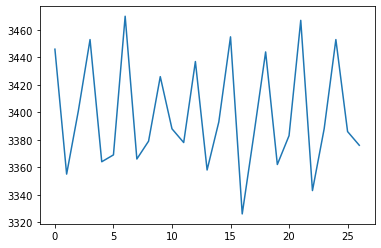

In [17]:
plt.plot(range(27) ,cs)